In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk

#regex
import re

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aditi_zg48xl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:

cwd = os.getcwd()

df = pd.read_csv(cwd+"/BA_reviews.csv", index_col=0)

In [4]:
df.head()

,reviews,stars,date,country
0,Not Verified | Only the second time flying BA ...,5.0,14th May 2023,United States
1,✅ Trip Verified | I wasn't going to bother rev...,3.0,14th May 2023,United Kingdom
2,✅ Trip Verified | I booked business class tic...,3.0,13th May 2023,United States
3,✅ Trip Verified | I will never travel with Br...,1.0,8th May 2023,Australia
4,✅ Trip Verified | I am already in Portugal so...,1.0,6th May 2023,United Kingdom


In [5]:
df.shape

(3500, 4)

In [6]:
df.isnull()

,reviews,stars,date,country
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
3495,False,False,False,False
3496,False,False,False,False
3497,False,False,False,False
3498,False,False,False,False


In [7]:
df.nunique()


reviews    3493
stars        10
date       1697
country      69
dtype: int64

In [8]:
df.describe()

,stars
count,3495.000000
mean,4.789413
std,3.151898
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,10.000000


<Axes: >

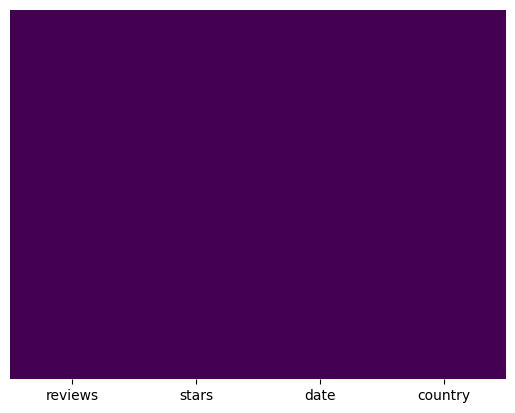

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='stars', ylabel='count'>

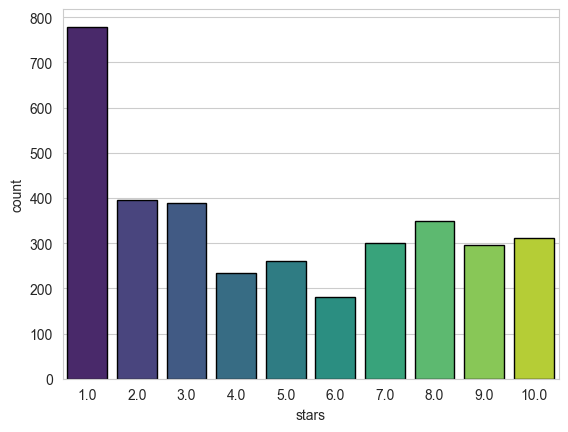

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='stars',data=df,palette='viridis',saturation=0.8,edgecolor="black")


In [11]:
df.dtypes

reviews     object
stars      float64
date        object
country     object
dtype: object

In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aditi_zg48xl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
# importing libraries
!pip install vaderSentiment
import regex as re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

# lemmatizing
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aditi_zg48xl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aditi_zg48xl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aditi_zg48xl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aditi_zg48xl\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aditi_zg48xl\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [14]:
def text_preprocessing(txt):
    # removing trip verified which is common for all
    if '|' in txt:
        txt = txt.split("|")[1]
        txt = txt.lower()
        return txt

    # Lower casing
    else:
        # Removing punctuation
        txt = re.sub(r'[^\w\s]', '', txt)

        # Tokenizing
        txt = nltk.word_tokenize(txt)

        # Removing stop words
        without_stopwords = []
        stop_words = stopwords.words('english')
        for word in txt:
            if word not in stop_words:
                without_stopwords.append(word)

        return without_stopwords


In [15]:
df['cleaned_reviews'] = df['reviews'].apply(text_preprocessing)

In [16]:
df.head()

,reviews,stars,date,country,cleaned_reviews
0,Not Verified | Only the second time flying BA ...,5.0,14th May 2023,United States,only the second time flying ba as first time ...
1,✅ Trip Verified | I wasn't going to bother rev...,3.0,14th May 2023,United Kingdom,i wasn't going to bother reviewing this fligh...
2,✅ Trip Verified | I booked business class tic...,3.0,13th May 2023,United States,i booked business class tickets for my fianc...
3,✅ Trip Verified | I will never travel with Br...,1.0,8th May 2023,Australia,i will never travel with british airways aga...
4,✅ Trip Verified | I am already in Portugal so...,1.0,6th May 2023,United Kingdom,i am already in portugal so contacted them t...


In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [21]:
analyzer = SentimentIntensityAnalyzer()

In [22]:
def get_sentiment_score(txt):
  return analyzer.polarity_scores(txt)['compound']

def get_sentiment_class(txt):
  compound = analyzer.polarity_scores(txt)['compound']
  result = ''
  if compound >= 0.5:
    return 'Positive'
  elif compound < 0 :
    return 'Negative'
  else:
    return 'Neutral'

In [23]:
 df['sentiment_score'] = df['cleaned_reviews'].apply(get_sentiment_score)

In [24]:
df['sentiment'] = df['cleaned_reviews'].apply(get_sentiment_class)

In [25]:
df.head(50)

,reviews,stars,date,country,cleaned_reviews,sentiment_score,sentiment
0,Not Verified | Only the second time flying BA ...,5.0,14th May 2023,United States,only the second time flying ba as first time ...,0.8898,Positive
1,✅ Trip Verified | I wasn't going to bother rev...,3.0,14th May 2023,United Kingdom,i wasn't going to bother reviewing this fligh...,0.8782,Positive
2,✅ Trip Verified | I booked business class tic...,3.0,13th May 2023,United States,i booked business class tickets for my fianc...,-0.7894,Negative
3,✅ Trip Verified | I will never travel with Br...,1.0,8th May 2023,Australia,i will never travel with british airways aga...,-0.9810,Negative
4,✅ Trip Verified | I am already in Portugal so...,1.0,6th May 2023,United Kingdom,i am already in portugal so contacted them t...,-0.5719,Negative
5,✅ Trip Verified | Terrible. Avoid this airlin...,1.0,6th May 2023,United Kingdom,terrible. avoid this airline. it’s now becom...,-0.8519,Negative
6,✅ Trip Verified | Despite being a gold member...,1.0,1st May 2023,United Kingdom,"despite being a gold member, the british air...",-0.2382,Negative
7,Not Verified | Regarding the aircraft and seat...,2.0,28th April 2023,United Kingdom,regarding the aircraft and seat: the business...,-0.7786,Negative
8,Not Verified | I travelled with British Airway...,5.0,26th April 2023,Sweden,i travelled with british airways from sweden ...,-0.9455,Negative
9,Not Verified | Food was lousy. Who ever is pl...,1.0,24th April 2023,United States,food was lousy. who ever is planning the asi...,-0.7881,Negative


In [28]:
df.head()

,reviews,stars,date,country,cleaned_reviews,sentiment_score,sentiment
0,Not Verified | Only the second time flying BA ...,5.0,14th May 2023,United States,only the second time flying ba as first time ...,0.8898,Positive
1,✅ Trip Verified | I wasn't going to bother rev...,3.0,14th May 2023,United Kingdom,i wasn't going to bother reviewing this fligh...,0.8782,Positive
2,✅ Trip Verified | I booked business class tic...,3.0,13th May 2023,United States,i booked business class tickets for my fianc...,-0.7894,Negative
3,✅ Trip Verified | I will never travel with Br...,1.0,8th May 2023,Australia,i will never travel with british airways aga...,-0.9810,Negative
4,✅ Trip Verified | I am already in Portugal so...,1.0,6th May 2023,United Kingdom,i am already in portugal so contacted them t...,-0.5719,Negative


## In the above plot Positive: 0, Negative: 1 and Neutral: -1 

In [30]:
df['sentiment'].value_counts()

sentiment
Neutral     1666
Negative     938
Positive     896
Name: count, dtype: int64

In [32]:
vader_counts = df['sentiment'].value_counts()

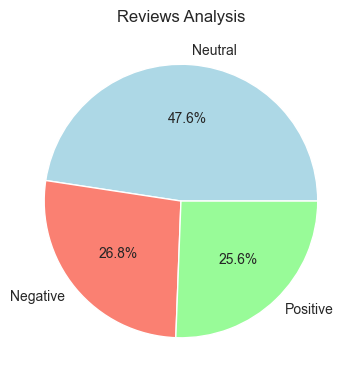

In [50]:
import matplotlib.pyplot as plt

# Define the colors you want to use
colors = ['lightblue','salmon','palegreen']

plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 2)
plt.title("Reviews Analysis")

# Specify the colors using the 'colors' parameter
plt.pie(vader_counts.values, labels=vader_counts.index, explode=(0, 0, 0), autopct='%1.1f%%', shadow=False, colors=colors)

plt.show()

In [32]:
!pip install wordcloud

In [34]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=500,min_font_size=10,background_color='white')
df['cleaned_reviews'] = df['cleaned_reviews'].astype(str)
txt = wc.generate(df['cleaned_reviews'].str.cat(sep=" "))
# txt = wc.generate(df['cleaned_reviews'].str.cat(sep=" "))

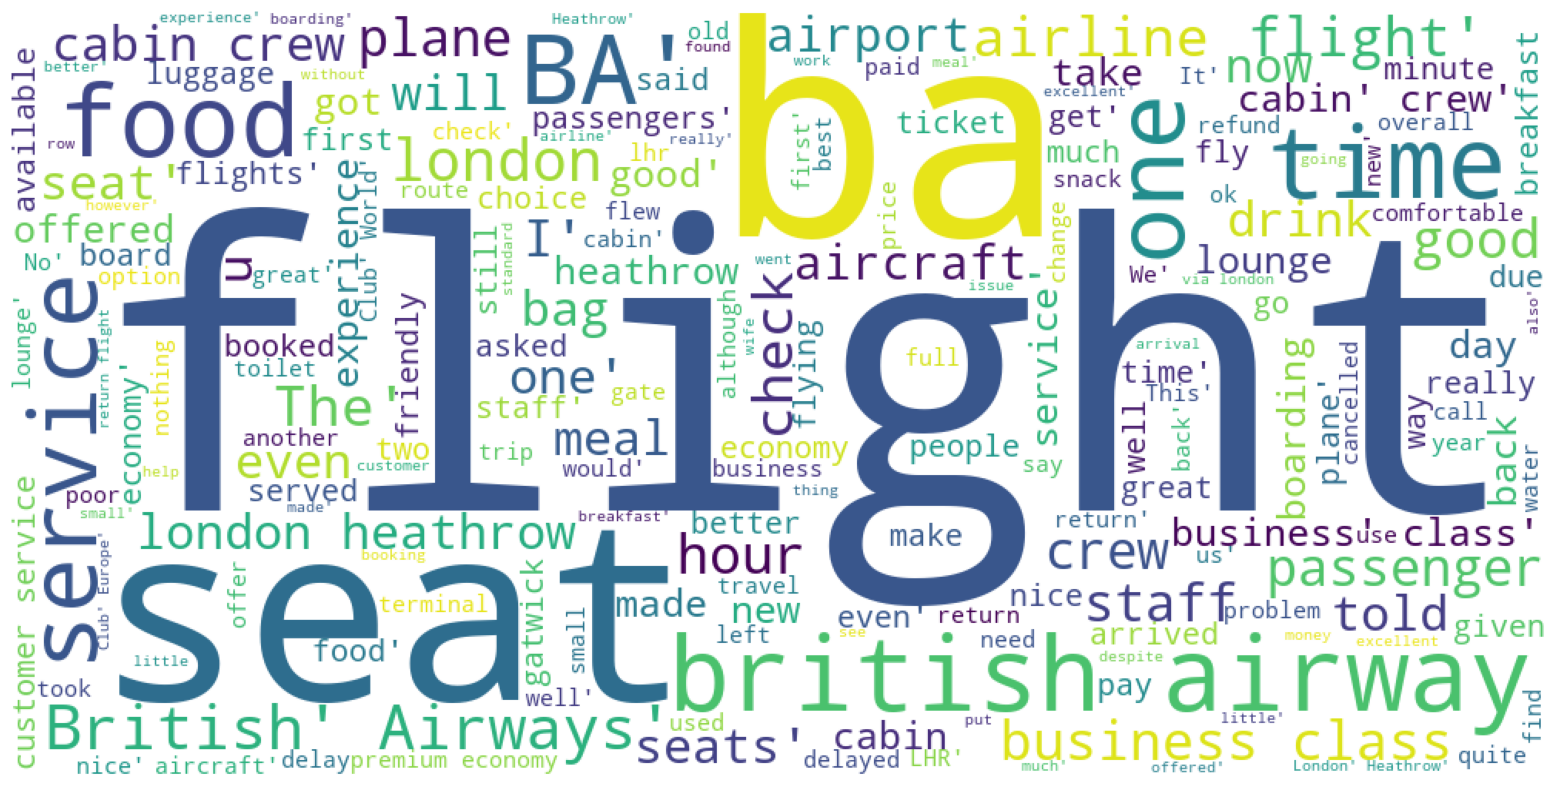

In [35]:
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(txt)